In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/My Drive/MLPS_final_project/data/covidcast_new.csv'

df = pd.read_csv(file_path)

df.head()

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d
0,1/7/2021,1000,34.412959,12.541558,1.464798,65.771681,22.086274,52.854667,29.288429,30.487852,57.334785,3.244379,2.6382,28.469582,18.571266,9.482316,24.962112,84.311759,12.627098
1,1/7/2021,1003,32.814153,10.189340,1.270183,61.516584,25.179399,51.160278,NaN,28.384842,53.172285,1.199572,NaN,27.532881,23.406516,8.933682,28.864558,82.778220,11.727249
2,1/7/2021,1015,35.621311,14.591271,6.594649,NaN,NaN,54.503711,NaN,37.003522,NaN,3.890709,NaN,NaN,20.974363,NaN,NaN,NaN,13.255336
3,1/7/2021,1051,40.453615,14.164503,3.320922,68.718538,19.438763,54.948755,NaN,37.637900,67.550815,3.284647,NaN,30.223647,20.009477,7.570250,26.494057,86.587182,13.823318
4,1/7/2021,1069,39.228766,10.103564,0.288897,59.961036,23.065494,60.118290,NaN,36.156326,55.995745,1.881970,NaN,30.806929,16.574756,12.916249,24.747620,85.825453,10.258936


In [ ]:
df = df[df.drop(columns=['smoothed_wtested_positive_14d']).notna().all(axis=1)]

#### Clustering

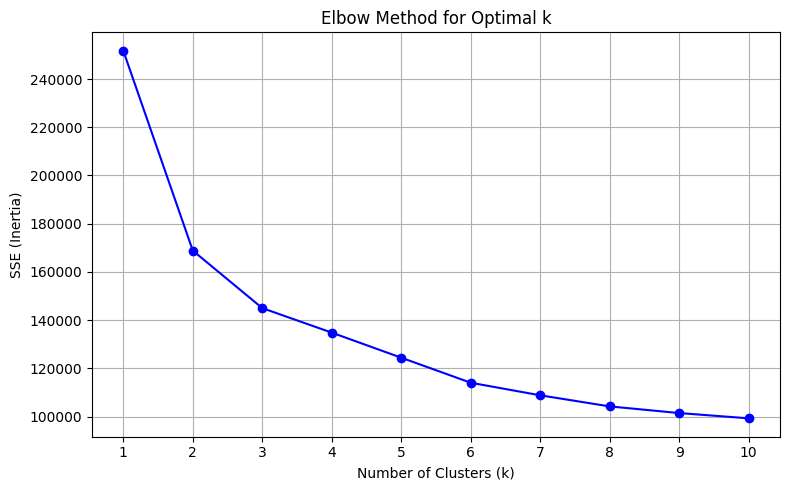

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Used Features
cluster_features = [
    'smoothed_wwearing_mask',
    'smoothed_wothers_masked',
    'smoothed_wwork_outside_home_1d',
    'smoothed_wlarge_event_1d',
    'smoothed_wrestaurant_1d',
    'smoothed_wshop_1d',
    'smoothed_wpublic_transit_1d',
    'smoothed_wspent_time_1d',
    'smoothed_wworried_become_ill',
    'smoothed_wvaccine_likely_friends',
    'smoothed_wvaccine_likely_who',
    'smoothed_wvaccine_likely_govt_health',
    'smoothed_wvaccine_likely_politicians'
]


df_cluster = df[cluster_features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Elbow Method - storing SSE
sse = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  # inertia = within-cluster sum of squares

# 3. Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, sse, 'o-', color='blue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.xticks(K_range)
plt.tight_layout()
plt.show()


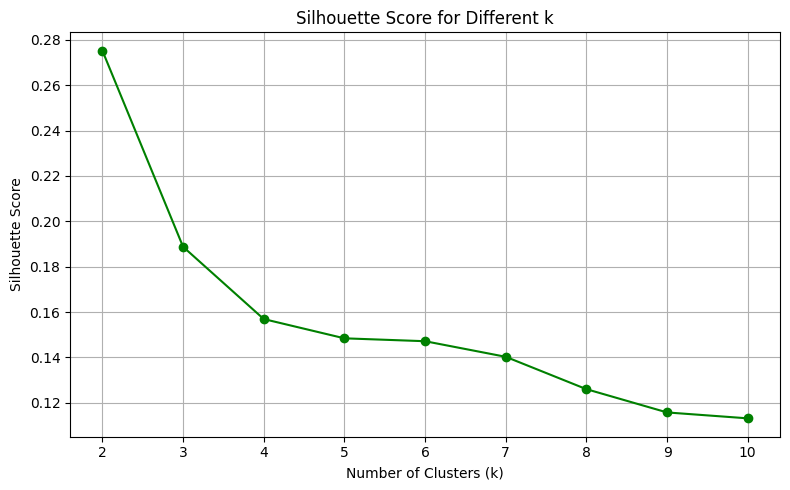

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K_range, sil_scores, marker='o', color='green')
plt.title("Silhouette Score for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# KMeans Clustering (Clusters number = 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

cluster_summary = df_cluster.groupby('cluster').mean()
print(cluster_summary)

         smoothed_wwearing_mask  smoothed_wothers_masked  \
cluster                                                    
0                     93.220890                84.556918   
1                     85.980991                67.249244   
2                     96.275825                91.063831   

         smoothed_wwork_outside_home_1d  smoothed_wlarge_event_1d  \
cluster                                                             
0                             34.141472                  7.661358   
1                             38.171555                 12.855904   
2                             29.015421                  4.508620   

         smoothed_wrestaurant_1d  smoothed_wshop_1d  \
cluster                                               
0                      14.717243          53.367117   
1                      21.160902          57.238416   
2                       9.962872          50.033470   

         smoothed_wpublic_transit_1d  smoothed_wspent_time_1d  \
cluster     

In [ ]:
# Add the vaccination rate information to df_cluster, matching the index from the original df.
df_cluster['smoothed_wcovid_vaccinated'] = df.loc[df_cluster.index, 'smoothed_wcovid_vaccinated']

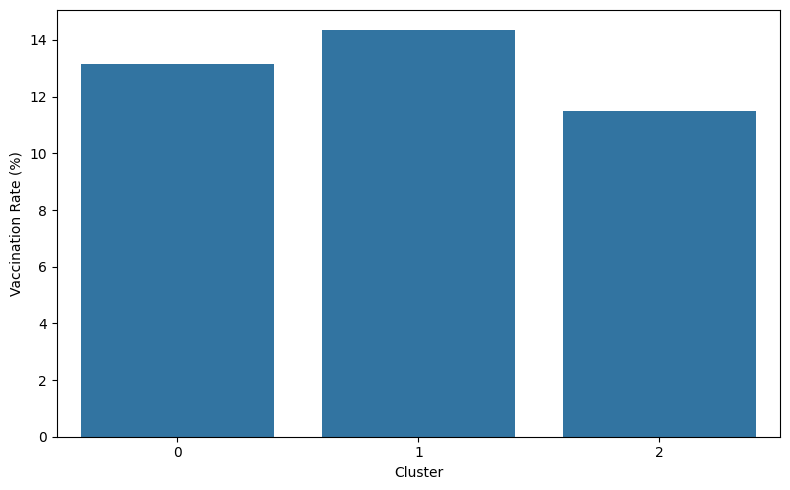

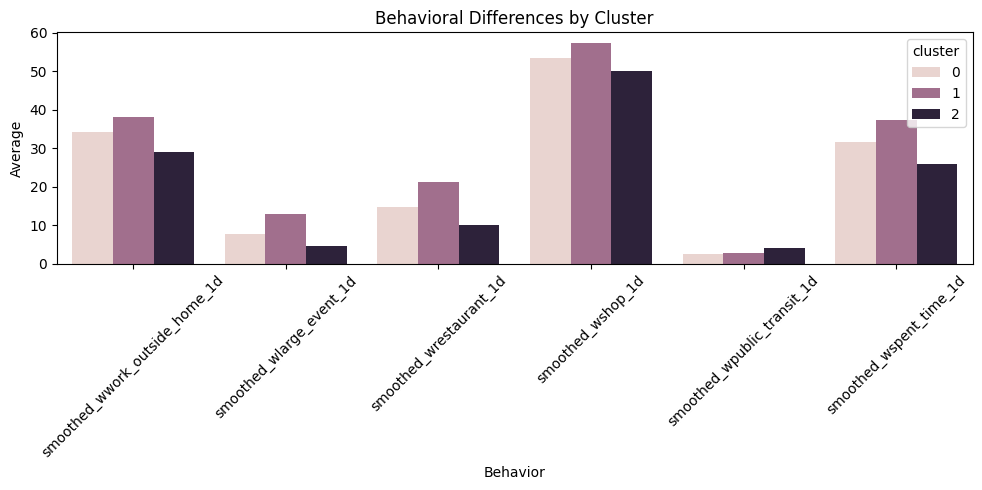

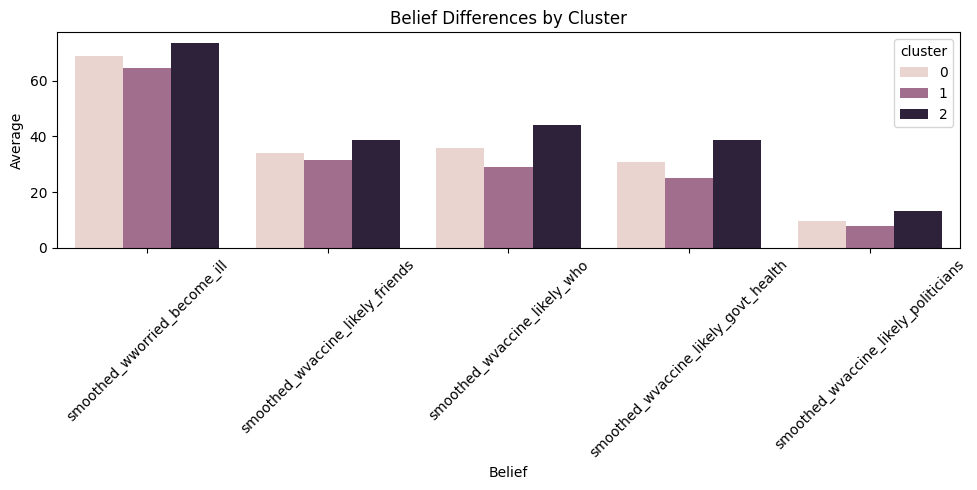

In [ ]:
# 1. Vaccination Rate Differences
plt.figure(figsize=(8, 5))
sns.barplot(data=df_cluster, x='cluster', y='smoothed_wcovid_vaccinated', errorbar=None)
plt.ylabel('Vaccination Rate (%)')
plt.xlabel('Cluster')
plt.tight_layout()
plt.show()

# 2. Define Behavioral Variables
behavior_vars = [
    'smoothed_wwork_outside_home_1d', 'smoothed_wlarge_event_1d',
    'smoothed_wrestaurant_1d', 'smoothed_wshop_1d',
    'smoothed_wpublic_transit_1d', 'smoothed_wspent_time_1d'
]

# 3. Define Belief (Vaccine/Health) Related Variables
belief_vars = [
    'smoothed_wworried_become_ill',
    'smoothed_wvaccine_likely_friends',
    'smoothed_wvaccine_likely_who',
    'smoothed_wvaccine_likely_govt_health',
    'smoothed_wvaccine_likely_politicians'
]

# 4. Calculate Cluster-wise Averages
behavior_summary = df_cluster.groupby('cluster')[behavior_vars].mean().reset_index()
belief_summary = df_cluster.groupby('cluster')[belief_vars].mean().reset_index()

# 5. Melt for Visualization
behavior_melted = behavior_summary.melt(id_vars='cluster', var_name='Behavior', value_name='Average')
belief_melted = belief_summary.melt(id_vars='cluster', var_name='Belief', value_name='Average')

# 6. Plot Behavioral Differences
plt.figure(figsize=(10, 5))
sns.barplot(data=behavior_melted, x='Behavior', y='Average', hue='cluster')
plt.title('Behavioral Differences by Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  7. Plot Belief Differences
plt.figure(figsize=(10, 5))
sns.barplot(data=belief_melted, x='Belief', y='Average', hue='cluster')
plt.title('Belief Differences by Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Understanding each clusters  

|Cluster|Behavioral Summary|Belief Summary|Vacciation Rate|Suggested Strategy|
|------|------|-----|--------|-------|
|0|	😷 High mask usage, moderate activity levels|🤝 Moderate concern, moderate trust in health authorities|	✅ Above average|	"Balanced Type" → Focus on maintaining current behavior|
|1|	🏃 High activity levels, low mask usage|❗ Low concern and lowest trust in vaccines and institutions|	⛔ Moderate|	"Indifferent/Skeptical Type" → Leverage peer influence and trust-based messaging|
|2|	🧍 Low activity levels, high mask usage|😟 High concern and high trust in public health authorities음|	⛔ Low|	"Cautious Type" → Improve infrastructure and accessibility to vaccination|

Major Insights  
1. Vaccination Rates by Cluster  
Cluster 1 shows the highest vaccination rate (average 14.4%), while Cluster 2 has the lowest (11.5%).  
Despite having positive perceptions toward health authorities, Cluster 2’s vaccination rate remains low, suggesting potential physical barriers or accessibility issues.  

2. Behavioral Differences  
Cluster 1: High levels of activity, including frequent outings, shopping, and attending large events.  
Cluster 2: Low activity levels with a tendency to avoid social exposure.  
Cluster 0: Moderate activity levels, consistent mask usage, and a generally balanced approach to preventive behavior.  

3. Health and Vaccine Perceptions  
Cluster 2: High trust in public health institutions (government, WHO, politicians) and elevated levels of health concern.  
Cluster 1: Lowest levels of trust in vaccines and institutions, coupled with the least concern about health risks.  
Cluster 0: Moderate trust and concern, representing a group that maintains preventive measures while actively participating in social life.

In [ ]:
# State FIPS Code → Mapping with State
fips_to_state = {
    "01": "Alabama", "02": "Alaska", "04": "Arizona", "05": "Arkansas", "06": "California",
    "08": "Colorado", "09": "Connecticut", "10": "Delaware", "11": "DC", "12": "Florida",
    "13": "Georgia", "15": "Hawaii", "16": "Idaho", "17": "Illinois", "18": "Indiana",
    "19": "Iowa", "20": "Kansas", "21": "Kentucky", "22": "Louisiana", "23": "Maine",
    "24": "Maryland", "25": "Massachusetts", "26": "Michigan", "27": "Minnesota", "28": "Mississippi",
    "29": "Missouri", "30": "Montana", "31": "Nebraska", "32": "Nevada", "33": "New Hampshire",
    "34": "New Jersey", "35": "New Mexico", "36": "New York", "37": "North Carolina", "38": "North Dakota",
    "39": "Ohio", "40": "Oklahoma", "41": "Oregon", "42": "Pennsylvania", "44": "Rhode Island",
    "45": "South Carolina", "46": "South Dakota", "47": "Tennessee", "48": "Texas", "49": "Utah",
    "50": "Vermont", "51": "Virginia", "53": "Washington", "54": "West Virginia", "55": "Wisconsin",
    "56": "Wyoming"
}

In [ ]:
# If geo_value is an integer, convert it to a string and extract the first two digits
df['state_fips'] = df['geo_value'].astype(str).str.zfill(5).str[:2]
df['state'] = df['state_fips'].map(fips_to_state)

In [ ]:
df['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming',
       'DC'], dtype=object)

In [ ]:
# If 'state' does not exist in df_cluster, merge it from the original df
df_cluster['state'] = df.loc[df_cluster.index, 'state']

In [ ]:
state_dist = df_cluster.groupby(['cluster', 'state']).size().reset_index(name='count')
total_per_cluster = df_cluster['cluster'].value_counts().to_dict()
state_dist['percent'] = state_dist.apply(lambda row: row['count'] / total_per_cluster[row['cluster']] * 100, axis=1)

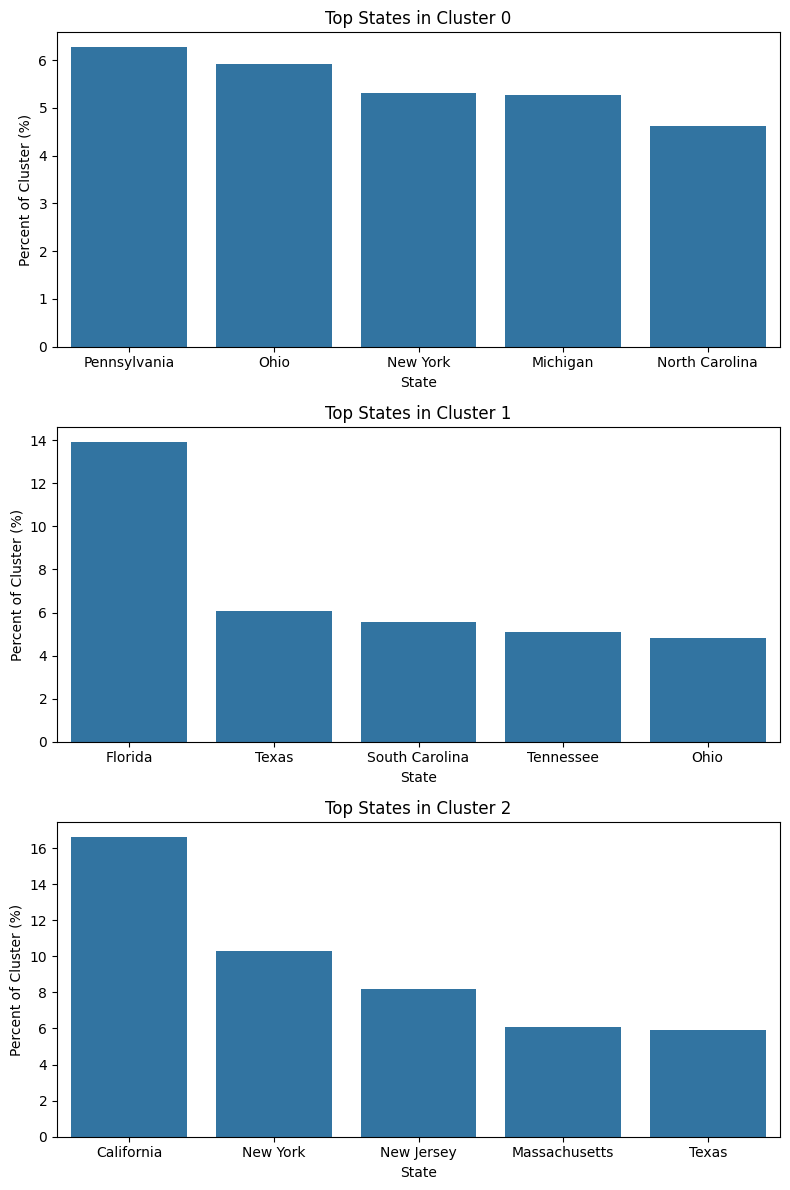

In [ ]:
unique_clusters = sorted(df_cluster['cluster'].unique())
num_clusters = len(unique_clusters)

fig, axs = plt.subplots(nrows=num_clusters, figsize=(8, 4 * num_clusters))

for i, clust in enumerate(unique_clusters):
    top_states = state_dist[state_dist['cluster'] == clust].sort_values(by='percent', ascending=False).head(5)
    sns.barplot(data=top_states, x='state', y='percent', ax=axs[i])
    axs[i].set_title(f'Top States in Cluster {clust}')
    axs[i].set_ylabel('Percent of Cluster (%)')
    axs[i].set_xlabel('State')

plt.tight_layout()
plt.show()

,cluster,state,percent
0,0,Pennsylvania,6.270663
1,0,Ohio,5.929028
2,0,New York,5.322901
3,0,Michigan,5.278819
4,0,North Carolina,4.628609
...,...,...,...
39,2,Nebraska,0.152818
40,2,Mississippi,0.095511
41,2,Montana,0.076409
42,2,South Carolina,0.019102


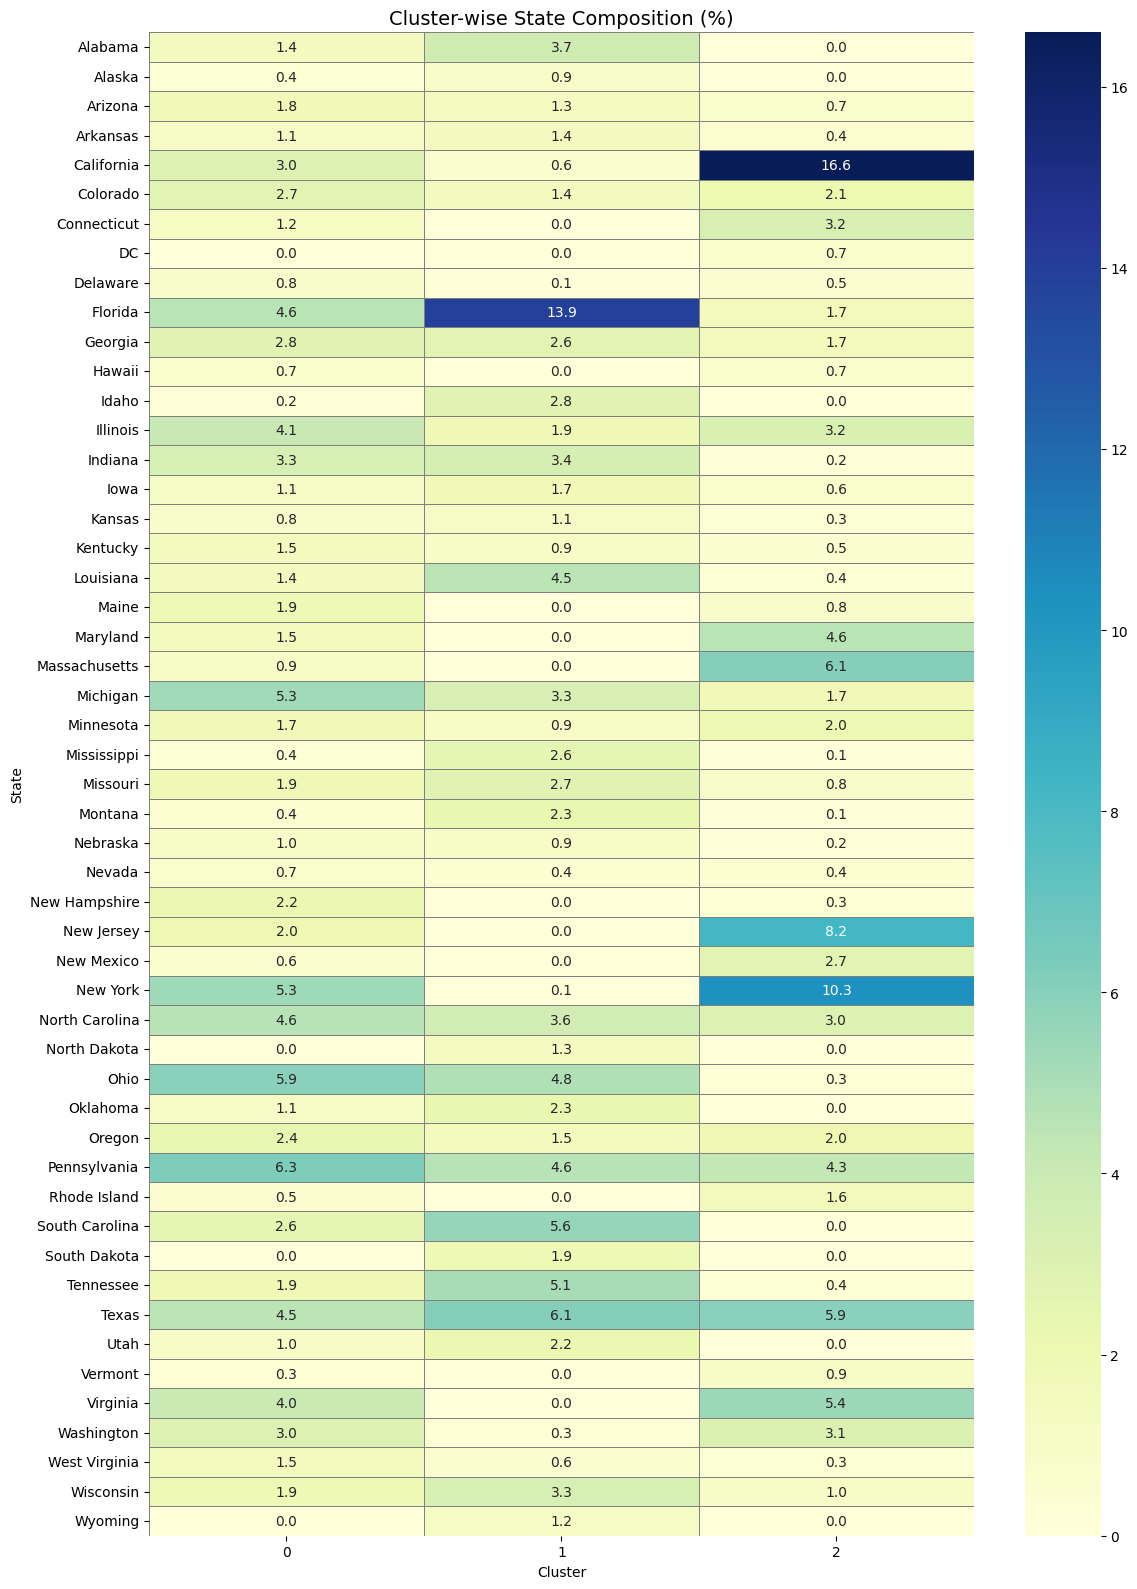

In [ ]:
# 1. Calculate the distribution of clusters by state
state_dist_all = (
    df_cluster.groupby(['cluster', 'state'])
    .size()
    .reset_index(name='count')
)

# 2. Calculate the percentage within each cluster
total_per_cluster = df_cluster['cluster'].value_counts().to_dict()
state_dist_all['percent'] = state_dist_all.apply(
    lambda row: row['count'] / total_per_cluster[row['cluster']] * 100, axis=1
)

# 3. Create a table sorted by percentage within each cluster
cluster_sorted_tables = {}
for clust in sorted(df_cluster['cluster'].unique()):
    temp = state_dist_all[state_dist_all['cluster'] == clust].sort_values(by='percent', ascending=False)
    cluster_sorted_tables[clust] = temp[['state', 'percent']].reset_index(drop=True)

# 4. 📊 Merge into a single table for easier viewing
cluster_combined = pd.concat(cluster_sorted_tables, names=['cluster']).reset_index(level=0)

# 👉 Display the combined table nicely using Pandas
from IPython.display import display
display(cluster_combined)

# 5. Prepare data for the heatmap
heatmap_data = state_dist_all.pivot(index='state', columns='cluster', values='percent').fillna(0)

# 6. 🔥 Visualize the heatmap
plt.figure(figsize=(12, 16))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5, linecolor='gray')
plt.title("Cluster-wise State Composition (%)", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("State")
plt.tight_layout()
plt.show()


Key States by Cluster (State Composition)  

- Cluster 0
Representative states: Florida, Texas, Ohio  
→ Primarily concentrated in southern and midwestern regions, including major cities with high activity levels.  

- Cluster 1  
Representative states: Florida, Indiana, Ohio, South Carolina  
→ Focused on high-activity regions, with notable vaccine skepticism present.  

- Cluster 2  
Representative states: California, New York, New Jersey, Massachusetts  
→ Concentrated in progressive-leaning states; despite positive perceptions toward health measures, vaccination rates are lower, possibly due to institutional or accessibility barriers.